In [1]:
import pandas as pd

In [6]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv",sep = ';')

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
wine_data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
def classify(r):
    if r <= 3:
        return 1
    elif r <= 6:
        return 2
    else:
        return 3
    
    
wine_data.quality = wine_data.quality.map(classify)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [11]:
wine_data.quality.value_counts()

2    3818
3    1060
1      20
Name: quality, dtype: int64

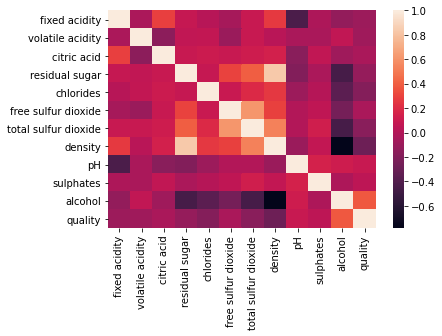

In [19]:
import seaborn as sns
sns.heatmap(pd.DataFrame(wine_data.corr(),index=wine_data.columns))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif

In [13]:
feature_data = wine_data.drop(columns=['quality'])
target_data = wine_data.quality

In [14]:
lr = LogisticRegression()
trainX,testX,trainY,testY = train_test_split(feature_data,target_data)

In [85]:
lr.fit(trainX,trainY)

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [86]:
lr.score(testX,testY)

0.793469387755102

In [87]:
trainX,testX,trainY,testY = train_test_split(feature_fs,target_data)

In [88]:
lr.fit(trainX,trainY)

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [89]:
lr.score(testX,testY)

0.7975510204081633

In [90]:
# for i in range(1,len(wine_data.columns)):
#     fs = SelectKBest(k=i,score_func=f_classif)
#     feature_fs = fs.fit_transform(feature_data,target_data)
#     trainX,testX,trainY,testY = train_test_split(feature_fs,target_data)
#     lr.fit(trainX,trainY)
#     print("k=",i,lr.score(testX,testY))

In [91]:
from sklearn.metrics import confusion_matrix

In [98]:
testY.value_counts()

2    962
3    256
1      7
Name: quality, dtype: int64

In [92]:
y_pred = lr.predict(testX)

In [96]:
conf_mat = confusion_matrix(y_pred=y_pred,y_true=testY)
conf_mat

array([[  0,   7,   0],
       [  0, 920,  42],
       [  0, 199,  57]], dtype=int64)

In [95]:
pd.DataFrame(conf_mat,columns=['Predicted 1', 'Predicted 2', 'Predicted 3'], index=['Actual 1', 'Actual 2', 'Actual 3'])

,Predicted 1,Predicted 2,Predicted 3
Actual 1,0,7,0
Actual 2,0,920,42
Actual 3,0,199,57


In [100]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [101]:
sampler = RandomOverSampler()

In [103]:
feature_s, target_s = sampler.fit_sample(feature_fs, target_data)

In [110]:
trainX,testX,trainY,testY = train_test_split(feature_s,target_s)

In [111]:
lr.fit(trainX,trainY)

c:\users\sanu menon\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [112]:
y_pred = lr.predict(testX)

In [113]:
confusion_matrix(y_pred=y_pred,y_true=testY)

array([[579, 207, 181],
       [277, 399, 265],
       [ 99, 231, 626]], dtype=int64)

In [115]:
lr.score(testX,testY)

0.5600558659217877

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt = DecisionTreeClassifier()

In [118]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [119]:
dt.score(testX, testY)

0.9521648044692738

In [120]:
y_pred = dt.predict(testX)

In [121]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[967,   0,   0],
       [  7, 829, 105],
       [  0,  25, 931]], dtype=int64)